# Custom OCR - training the NN

## Import libraries

In [1]:
import tensorflow
tensorflow.__version__
# pip install urllib3==1.26.6

'2.15.0'

In [2]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Loading Datasets

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [7]:
train_data[0].shape

(28, 28)

In [8]:
train_labels[0]

5

In [9]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [10]:
digits_data.shape, digits_labels.shape

((70000, 28, 28), (70000,))

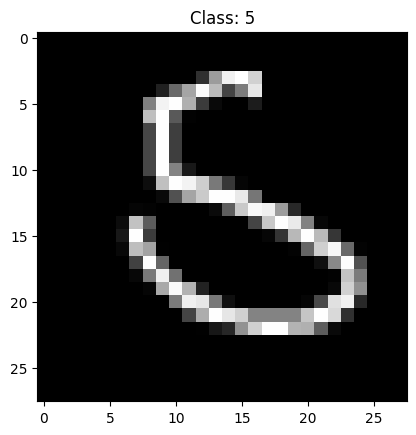

In [11]:
index = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[index], cmap='gray')
plt.title(f'Class: {digits_labels[index]}')
plt.show()

In [12]:
# sns.countplot(digits_labels);

## Kaggle A-Z

In [13]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2024-06-24 03:16:09--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   124MB/s    in 1.5s    

2024-06-24 03:16:10 (124 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]


In [14]:
zip_object = zipfile.ZipFile('alfabeto_A-Z.zip', mode='r')
zip_object.extractall('/content')
zip_object.close()

In [15]:
ds_az = pd.read_csv('A_Z Handwritten Data/A_Z Handwritten Data.csv')
ds_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
alphabet_data = ds_az.drop('0', axis=1)
alphabet_labels = ds_az['0']

In [17]:
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [18]:
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
alphabet_data.shape

(372450, 28, 28)

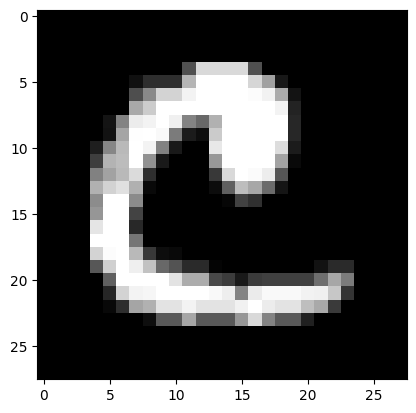

In [19]:
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap='gray')

In [20]:
# sns.countplot(alphabet_labels);


## Joining datasets

In [21]:
digits_labels, np.unique(digits_labels)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [22]:
alphabet_labels, np.unique(alphabet_labels)

(0          0
 1          0
 2          0
 3          0
 4          0
           ..
 372445    25
 372446    25
 372447    25
 372448    25
 372449    25
 Name: 0, Length: 372450, dtype: int64,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]))

In [23]:
alphabet_labels += 10

In [24]:
alphabet_labels, np.unique(alphabet_labels)

(0         10
 1         10
 2         10
 3         10
 4         10
           ..
 372445    35
 372446    35
 372447    35
 372448    35
 372449    35
 Name: 0, Length: 372450, dtype: int64,
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35]))

In [25]:
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [26]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [27]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [28]:
data = np.array(data, dtype='float32')

In [29]:
data = np.expand_dims(data, axis=-1)

In [30]:
data.shape

(442450, 28, 28, 1)

## Pre-processing the data

In [31]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [32]:
data /= 255.0

In [33]:
data[0].min(), data[0].max()

(0.0, 1.0)

In [34]:
np.unique(labels), len(np.unique(labels))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 36)

In [35]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [36]:
np.unique(labels)

array([0, 1])

In [37]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
labels[30000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

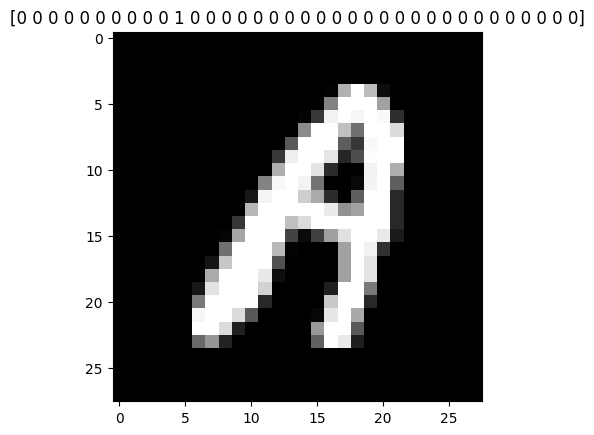

In [39]:
plt.imshow(data[0].reshape(28, 28), cmap='gray')
plt.title(f'{labels[0]}')

In [40]:
classes_total = labels.sum(axis=0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [41]:
classes_total.max()

57825

In [42]:
classes_weights = {}
for i in range(0, len(classes_total)):
    classes_weights[i] = classes_total.max() / classes_total[i]


In [43]:
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)
X_train.shape, X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [45]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range = 0.05, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = False)

## Building Neural Network

- [Padding: `same` vs `valid`](https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [49]:
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape=(28, 28, 1)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding='same'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding='valid'))
network.add(MaxPooling2D(pool_size=(2, 2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation = 'softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [50]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [51]:
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Training Neural Network

In [52]:
file_model = 'custom_ocr.keras'
epochs = 20
batch_size = 128

In [53]:
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [54]:
len(X_train) // batch_size

2765

In [55]:
history = network.fit(
    augmentation.flow(X_train, y_train, batch_size = batch_size),
    validation_data = (X_test, y_test),
    steps_per_epoch = len(X_train) // batch_size,
    epochs = epochs,
    class_weight = classes_weights,
    verbose = 1,
    callbacks = [checkpointer]
)

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.2302 - accuracy: 0.8216
Epoch 1: val_loss improved from inf to 0.33049, saving model to custom_ocr.keras
2765/2765 [==============================] - 173s 60ms/step - loss: 2.2302 - accuracy: 0.8216 - val_loss: 0.3305 - val_accuracy: 0.8635
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9879 - accuracy: 0.9005
Epoch 2: val_loss improved from 0.33049 to 0.23755, saving model to custom_ocr.keras
2765/2765 [==============================] - 153s 55ms/step - loss: 0.9879 - accuracy: 0.9005 - val_loss: 0.2375 - val_accuracy: 0.8998
Epoch 3/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.8142 - accuracy: 0.9129
Epoch 3: val_loss improved from 0.23755 to 0.18900, saving model to custom_ocr.keras
2765/2765 [==============================] - 155s 56ms/step - loss: 0.8142 - accuracy: 0.9129 - val_loss: 0.1890 - val_accuracy: 0.9340
Epoch 4/20
2765/2765 [=========================

## Evaluating the neural network

In [56]:
X_test.shape

(88490, 28, 28, 1)

In [57]:
predictions = network.predict(X_test, batch_size=batch_size)
predictions

692/692 [==============================] - 2s 3ms/step


array([[2.8818351e-01, 1.1479199e-10, 5.0578131e-10, ..., 2.3567968e-19,
        5.7821588e-09, 7.0503038e-13],
       [1.5419406e-20, 9.8619669e-13, 2.8431784e-13, ..., 8.6149284e-13,
        1.0434641e-13, 2.5992450e-11],
       [5.9857780e-10, 1.4439673e-11, 2.9549244e-13, ..., 1.3935830e-10,
        2.5283707e-11, 1.8617625e-15],
       ...,
       [2.8976917e-01, 2.0888470e-07, 5.6327805e-09, ..., 6.3690703e-13,
        4.1741213e-08, 3.6262318e-10],
       [3.3765835e-25, 8.4306298e-13, 1.4026763e-09, ..., 9.9997342e-01,
        6.9119396e-06, 6.4100036e-09],
       [1.2108398e-09, 2.1855048e-12, 1.1969542e-13, ..., 2.4257622e-17,
        2.0521798e-08, 6.4689282e-11]], dtype=float32)

In [58]:
predictions[0], len(predictions)

(array([2.8818351e-01, 1.1479199e-10, 5.0578131e-10, 3.1307051e-11,
        2.1325950e-11, 2.6238502e-07, 4.8596536e-07, 5.4860349e-11,
        2.6308404e-09, 7.7674294e-09, 3.5605267e-12, 3.7085730e-09,
        1.2937109e-06, 8.5799466e-04, 3.2810856e-09, 3.1353808e-17,
        1.9318978e-07, 1.9432871e-15, 1.0212862e-15, 5.5663304e-07,
        3.6588492e-13, 5.2419979e-10, 5.6887885e-14, 2.7875470e-07,
        7.1074861e-01, 6.6545959e-07, 1.4859298e-04, 1.7511382e-16,
        7.7623390e-08, 9.6777120e-10, 5.7347501e-05, 4.5173839e-14,
        6.1398268e-11, 2.3567968e-19, 5.7821588e-09, 7.0503038e-13],
       dtype=float32),
 88490)

In [64]:
np.argmax(predictions[0]), name_labels[np.argmax(predictions[0])]

(24, 'O')

In [65]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
np.argmax(y_test[0]), name_labels[np.argmax(y_test[0])]

(24, 'O')

In [67]:
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 14s 5ms/step - loss: 0.1592 - accuracy: 0.9431


[0.15923386812210083, 0.9431121945381165]

In [68]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), target_names=name_labels))

              precision    recall  f1-score   support

           0       0.35      0.67      0.46      1381
           1       0.98      0.99      0.98      1575
           2       0.94      0.96      0.95      1398
           3       0.96      0.99      0.98      1428
           4       0.93      0.96      0.94      1365
           5       0.52      0.97      0.68      1263
           6       0.94      0.98      0.96      1375
           7       0.94      0.99      0.96      1459
           8       0.96      0.98      0.97      1365
           9       0.97      0.96      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.99      0.97      0.98      1734
           C       1.00      0.96      0.98      4682
           D       0.84      0.98      0.90      2027
           E       1.00      0.97      0.98      2288
           F       0.97      0.99      0.98       233
           G       0.97      0.95      0.96      1152
           H       0.98    

In [69]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

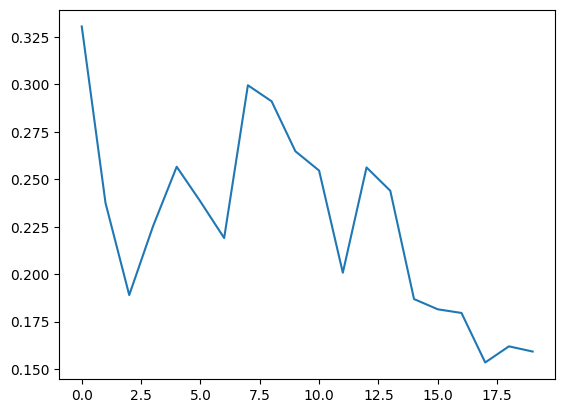

In [70]:
plt.plot(history.history['val_loss'])

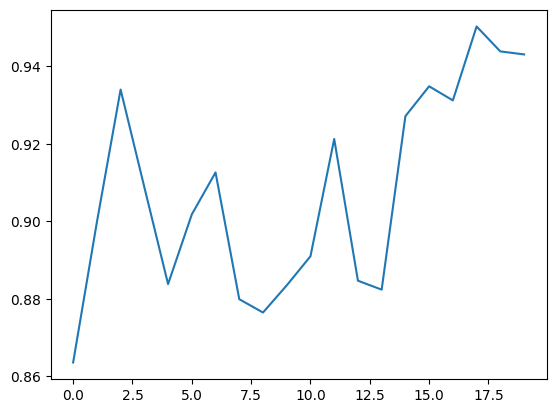

In [71]:
plt.plot(history.history['val_accuracy'])

## Saving the neural network

In [72]:
network.save('network', save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [73]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [74]:
!cp network /content/drive/MyDrive/Models/

## Testing neural networks

In [76]:
from tensorflow.keras.models import load_model
loaded_network = load_model('/content/drive/MyDrive/Models/network')

In [77]:
loaded_network

In [78]:
loaded_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

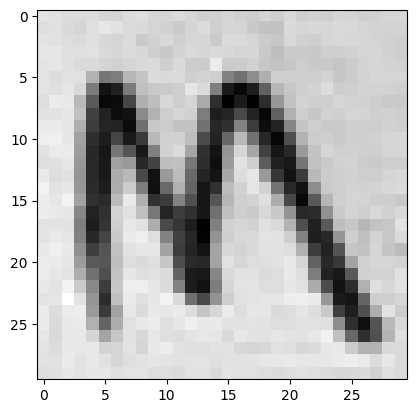

In [81]:
import cv2

img = cv2.imread("Sources/Images/letter-m.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

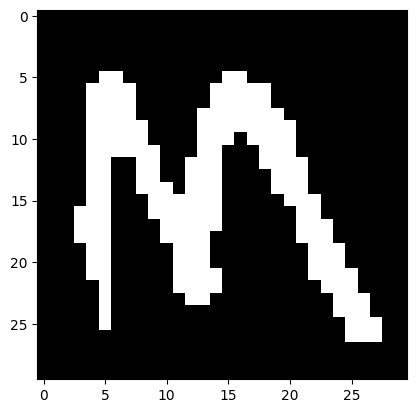

In [82]:
value, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

In [83]:
value

137.0

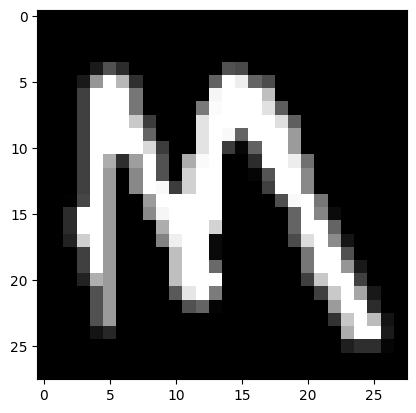

In [84]:
img = cv2.resize(thresh, (28, 28))
plt.imshow(img, cmap='gray')
plt.show()

In [85]:
img.shape

(28, 28)

In [86]:
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=-1)
img.shape


(28, 28, 1)

In [87]:
img = np.reshape(img, (1, 28, 28, 1))
img.shape

(1, 28, 28, 1)

In [89]:
prediction = loaded_network.predict(img)
prediction

1/1 [==============================] - 2s 2s/step


array([[3.10757142e-10, 1.41061199e-14, 2.09524039e-15, 1.32141688e-14,
        1.04227099e-10, 4.57627991e-10, 4.84460432e-12, 7.78447440e-09,
        1.32671096e-13, 8.46299810e-13, 3.94135668e-06, 1.01302064e-10,
        1.54493127e-10, 8.11928587e-08, 1.26768418e-09, 1.26065540e-13,
        7.78044740e-10, 2.04461739e-05, 2.46122118e-27, 2.38816085e-12,
        3.78359942e-07, 1.68263168e-12, 9.99887824e-01, 7.77196110e-05,
        3.13247916e-08, 3.87982875e-12, 1.99764198e-11, 3.12777672e-07,
        3.34526473e-09, 6.31289965e-10, 2.75792944e-09, 1.23248244e-19,
        9.16022418e-06, 1.24930587e-11, 6.71859183e-12, 4.22224748e-14]],
      dtype=float32)

In [90]:
np.argmax(prediction), name_labels[np.argmax(prediction)]

(22, 'M')